### Preparation of the dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy


In [ ]:
# import csv from local or drive
from google.colab import drive

try:  
  df = pd.read_csv(r"student-por.csv",sep=";")
  df.head(10)
  print('Downloaded from local')
except:
  drive.mount('/content/drive')
  df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Opti/student-por.csv')
  print('Downloaded from drive')

df.head()

Downloaded from local


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.shape

(649, 33)

This Dataset is composed of 33 Columns and 649 rows. All of this columns have an impact on the final grade but we don't know how much.

We need to do an optimization for optimize the final grade depending on the other columns. 

We need to change each string columns to categorical int for the futur optimization.

In [ ]:
df.school = pd.Categorical(df.school)
df.school = df.school.cat.codes

df.sex = pd.Categorical(df.sex)
df.sex = df.sex.cat.codes

df.address = pd.Categorical(df.address)
df.address = df.address.cat.codes

df.famsize = pd.Categorical(df.famsize)
df.famsize = df.famsize.cat.codes

df.Pstatus = pd.Categorical(df.Pstatus)
df.Pstatus = df.Pstatus.cat.codes

df.Mjob = pd.Categorical(df.Mjob)
df.Mjob = df.Mjob.cat.codes

df.Fjob = pd.Categorical(df.Fjob)
df.Fjob = df.Fjob.cat.codes

df.reason = pd.Categorical(df.reason)
df.reason = df.reason.cat.codes

df.guardian = pd.Categorical(df.guardian)
df.guardian = df.guardian.cat.codes

df.schoolsup = pd.Categorical(df.schoolsup)
df.schoolsup = df.schoolsup.cat.codes

df.famsup = pd.Categorical(df.famsup)
df.famsup = df.famsup.cat.codes

df.paid = pd.Categorical(df.paid)
df.paid = df.paid.cat.codes

df.activities = pd.Categorical(df.activities)
df.activities = df.activities.cat.codes

df.nursery = pd.Categorical(df.nursery)
df.nursery = df.nursery.cat.codes

df.higher = pd.Categorical(df.higher)
df.higher = df.higher.cat.codes

df.internet = pd.Categorical(df.internet)
df.internet = df.internet.cat.codes

df.romantic = pd.Categorical(df.romantic)
df.romantic = df.romantic.cat.codes

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


We check if there are missing value. by chance there no missing value.


In [ ]:
print (df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


We want to normalize the ratings means for adjusting values measured on 
different scales to a notionally common scale, often prior to averaging.

We can put the 32 columns into x (feature) and the final grade column to y (label)

In [ ]:
normalized_df=(df-df.min())/(df.max()-df.min())

y = df['G3']
x = normalized_df.drop(columns=['G3'])

x2 = df.drop(columns=['G3'])

After that we can now check the correlation

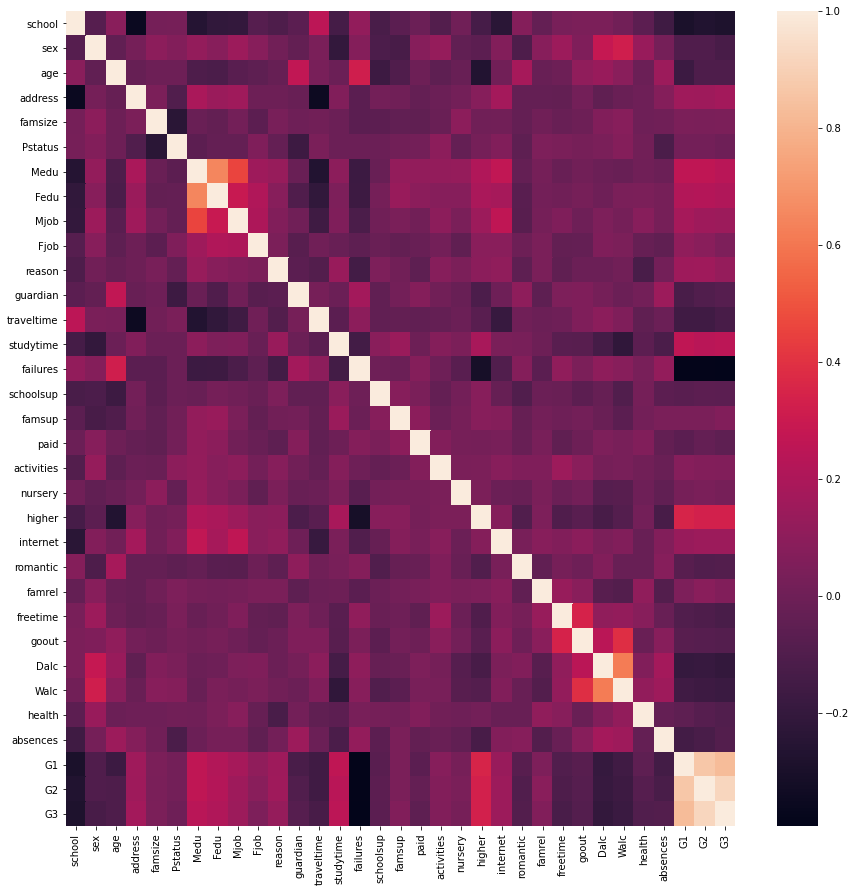

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

corrMatrix = df.corr()
plt.figure(figsize = (15,15))

sns.heatmap(corrMatrix,annot_kws={"size":15})
plt.show()

We can see that there are different correlation between G3 (final grade) and the other columns.

In [ ]:
df.corr()['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.918548
G1            0.826387
higher        0.332172
studytime     0.249789
Medu          0.240151
Fedu          0.211800
address       0.167637
internet      0.150025
Mjob          0.148252
reason        0.124969
famrel        0.063361
activities    0.059791
famsup        0.059206
Fjob          0.052953
famsize       0.045016
nursery       0.028752
Pstatus      -0.000754
paid         -0.054898
schoolsup    -0.066405
guardian     -0.079609
goout        -0.087641
romantic     -0.090583
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
sex          -0.129077
Walc         -0.176619
Dalc         -0.204719
school       -0.284294
failures     -0.393316
Name: G3, dtype: float64

### Data Visualization for more Understanding


Before testing different models, attributes and optimisers, we will create some graphs to show the relation between specific variables and the variable we want to  
We can see that Linear Regression will be the most efficient for our optimization.

Before we execute the linear regression model, we want to see how each variable are correlated with the final score. So we will do some data visualization. This visualization will be helpfull for the result of the model.


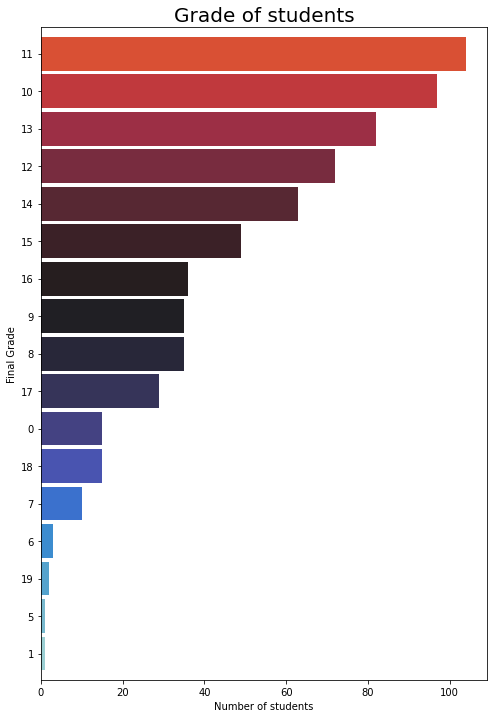

In [ ]:
plt.subplots(figsize=(8,12))
grade_counts = df['G3'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('icefire',20))
grade_counts.axes.set_title('Grade of students',fontsize=20)
grade_counts.set_xlabel('Number of students', fontsize=10)
grade_counts.set_ylabel('Final Grade', fontsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


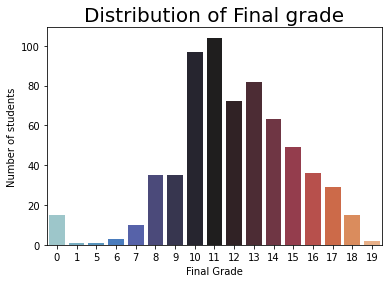

In [ ]:
count_plot = sns.countplot('G3',data=df,palette="icefire")
count_plot.axes.set_title('Distribution of Final grade', fontsize = 20)
count_plot.set_xlabel('Final Grade', fontsize = 10)
count_plot.set_ylabel('Number of students', fontsize = 10)
plt.show()

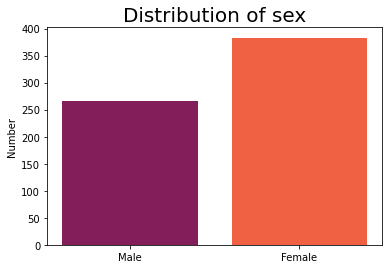

266 383


In [ ]:
Mstuds = len(df[df['sex'] == 1])
Fstuds = len(df[df['sex'] == 0])
x_value = ["Male","Female"]
y_value = [Mstuds,Fstuds]

plt.bar(x_value,y_value, align='center',color=sns.color_palette('rocket',2))
plt.ylabel('Number',fontsize=10)
plt.title('Distribution of sex',fontsize=20)

plt.show()
print(Mstuds,Fstuds)

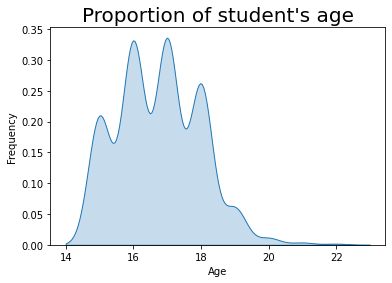

In [ ]:
studs_age = sns.kdeplot('age',data=df, shade=True)
studs_age.axes.set_title('Proportion of student\'s age',fontsize=20)
studs_age.set_xlabel('Age',fontsize=10)
studs_age.set_ylabel('Frequency',fontsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


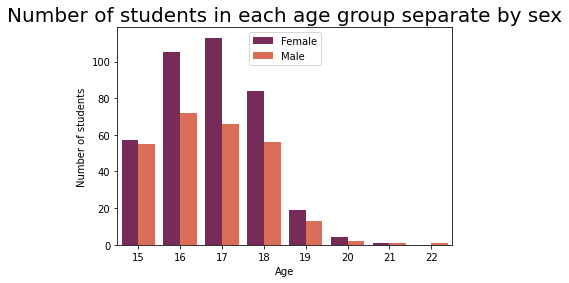

In [ ]:
StudPerGroup = sns.countplot('age',hue='sex', data=df,palette="rocket")
StudPerGroup.axes.set_title('Number of students in each age group separate by sex',fontsize=20)
StudPerGroup.set_xlabel("Age",fontsize=10)
StudPerGroup.set_ylabel("Number of students",fontsize=10)
StudPerGroup.legend(['Female', 'Male'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; yo

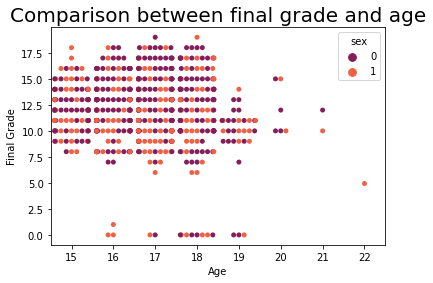

In [ ]:
GradeAndGenderPerAge = sns.swarmplot(x='age', y='G3',hue='sex', data=df,palette="rocket")
GradeAndGenderPerAge.axes.set_title('Comparison between final grade and age',fontsize=20)
GradeAndGenderPerAge.set_xlabel('Age',fontsize=10)
GradeAndGenderPerAge.set_ylabel('Final Grade',fontsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


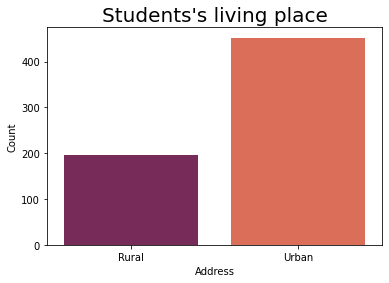

In [ ]:
adresse_studs = sns.countplot('address',data=df,palette="rocket")
adresse_studs.axes.set_title('Students\'s living place',fontsize=20)
adresse_studs.set_xlabel('Address',fontsize=10)
adresse_studs.set_ylabel('Count',fontsize=10)
adresse_studs.set(xticklabels=['Rural', 'Urban'])

plt.show()

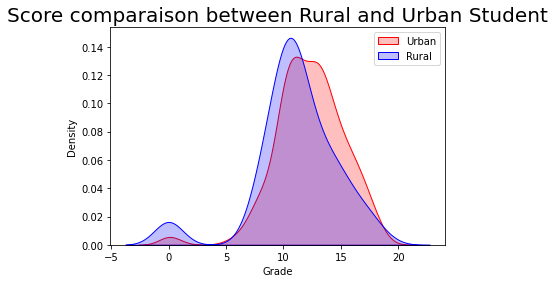

In [ ]:
# Grade distribution by address
sns.kdeplot(df.loc[df['address'] == 1, 'G3'], label='Urban',color='red', shade = True)
sns.kdeplot(df.loc[df['address'] == 0, 'G3'], label='Rural',color='blue', shade = True)
plt.title('Score comparaison between Rural and Urban Student',fontsize=20)
plt.xlabel('Grade',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.legend(['Urban', 'Rural'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


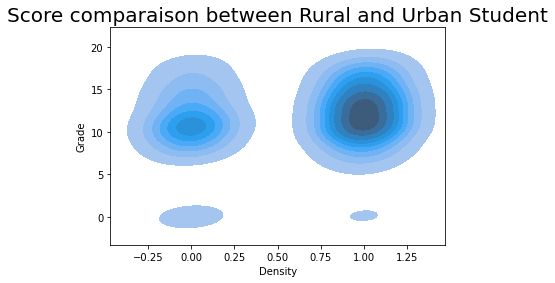

In [ ]:
# Grade distribution by address
sns.kdeplot('address', 'G3',data=df, shade = True)
plt.title('Score comparaison between Rural and Urban Student',fontsize=20)
plt.xlabel('Density',fontsize=10)
plt.ylabel('Grade',fontsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


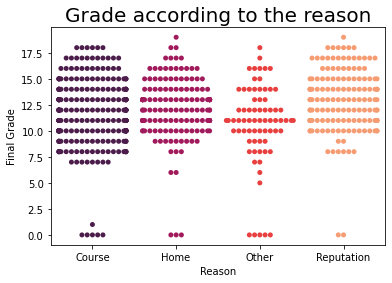

In [ ]:
reason_grade = sns.swarmplot('reason', 'G3', data=df,palette="rocket")
reason_grade.axes.set_title('Grade according to the reason',fontsize=20)
reason_grade.set_xlabel('Reason',fontsize=10)
reason_grade.set_ylabel('Final Grade',fontsize=10)

reason_grade.set(xticklabels=['Course', 'Home', 'Other', 'Reputation'])



plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


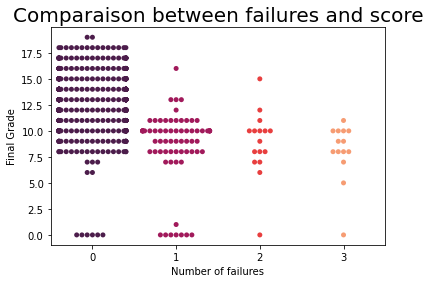

In [ ]:
failur_grade = sns.swarmplot('failures','G3',data=df,palette="rocket")
failur_grade.axes.set_title('Comparaison between failures and score',fontsize=20)
failur_grade.set_xlabel('Number of failures',fontsize=10)
failur_grade.set_ylabel('Final Grade',fontsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

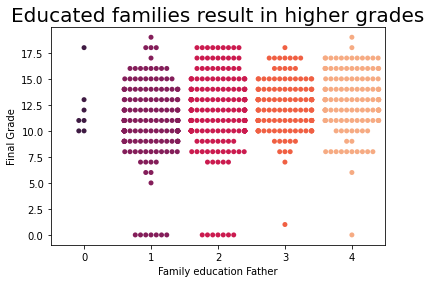

In [ ]:
Father_score = sns.swarmplot('Fedu','G3',data=df,palette="rocket")
Father_score.axes.set_title('Educated families result in higher grades',fontsize=20)
Father_score.set_xlabel('Family education Father',fontsize=10)
Father_score.set_ylabel('Final Grade',fontsize=10)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

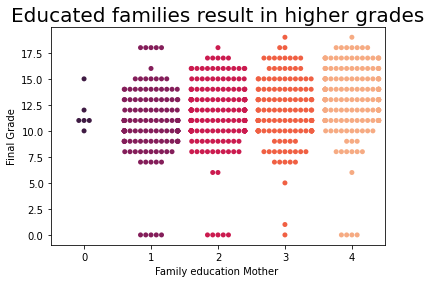

In [ ]:
Mother_score = sns.swarmplot('Medu','G3',data=df,palette="rocket")
Mother_score.axes.set_title('Educated families result in higher grades', fontsize = 20)
Mother_score.set_xlabel('Family education Mother ', fontsize = 10)
Mother_score.set_ylabel('Final Grade', fontsize = 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

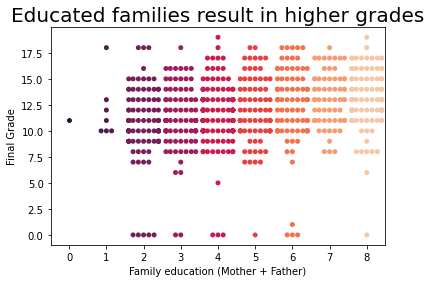

In [ ]:
family_education = df['Fedu']+df['Medu']
Parent_score = sns.swarmplot(family_education,'G3',data=df,palette="rocket")
Parent_score.axes.set_title('Educated families result in higher grades', fontsize = 20)
Parent_score.set_xlabel('Family education (Mother + Father)', fontsize = 10)
Parent_score.set_ylabel('Final Grade', fontsize = 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


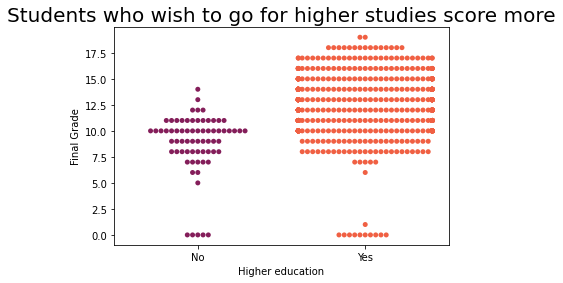

In [ ]:
wish_high_studies = sns.swarmplot('higher', 'G3',data=df,palette="rocket")
wish_high_studies.axes.set_title('Students who wish to go for higher studies score more', fontsize = 20)
wish_high_studies.set_xlabel('Higher education', fontsize = 10)
wish_high_studies.set_ylabel('Final Grade', fontsize = 10)
wish_high_studies.set(xticklabels=['No', 'Yes'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


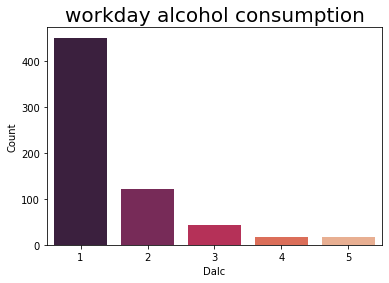

In [ ]:
alcohol_workday = sns.countplot('Dalc',data=df,palette="rocket")
alcohol_workday.axes.set_title('workday alcohol consumption', fontsize = 20)
alcohol_workday.set_xlabel('Dalc', fontsize = 10)
alcohol_workday.set_ylabel('Count', fontsize = 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


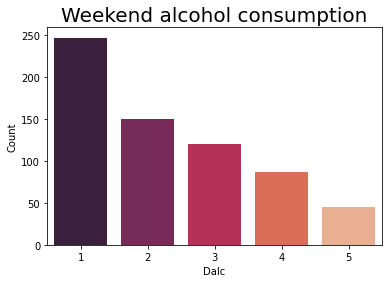

In [ ]:
alcohol_weekend = sns.countplot('Walc',data=df,palette="rocket")
alcohol_weekend.axes.set_title('Weekend alcohol consumption', fontsize = 20)
alcohol_weekend.set_xlabel('Dalc', fontsize = 10)
alcohol_weekend.set_ylabel('Count', fontsize = 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


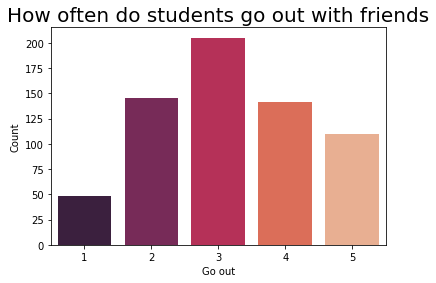

In [ ]:
gooutratio = sns.countplot('goout',data=df,palette="rocket")
gooutratio.axes.set_title('How often do students go out with friends', fontsize = 20)
gooutratio.set_xlabel('Go out', fontsize = 10)
gooutratio.set_ylabel('Count', fontsize = 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

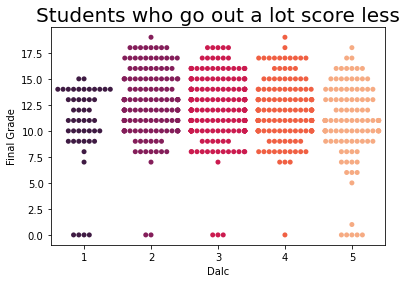

In [ ]:
goout = sns.swarmplot('goout','G3',data=df,palette="rocket")
goout.axes.set_title('Students who go out a lot score less', fontsize = 20)
goout.set_xlabel('Dalc', fontsize = 10)
goout.set_ylabel('Final Grade', fontsize = 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


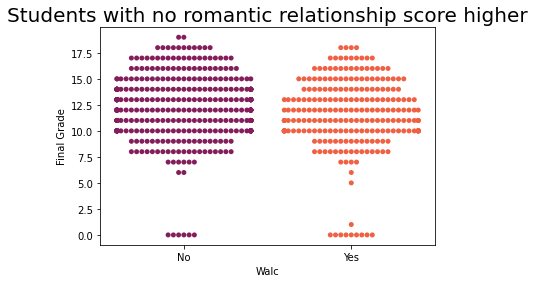

In [ ]:
roman = sns.swarmplot('romantic','G3',data=df,palette="rocket")
roman.axes.set_title('Students with no romantic relationship score higher', fontsize = 20)
roman.set_xlabel('Walc', fontsize = 10)
roman.set_ylabel('Final Grade', fontsize = 10)
roman.set(xticklabels=['No', 'Yes'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


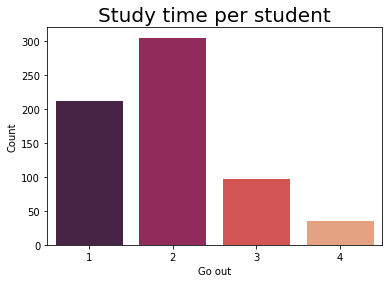

In [ ]:
studentstudytime = sns.countplot('studytime',data=df,palette="rocket")
studentstudytime.axes.set_title('Study time per student', fontsize = 20)
studentstudytime.set_xlabel('Go out', fontsize = 10)
studentstudytime.set_ylabel('Count', fontsize = 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


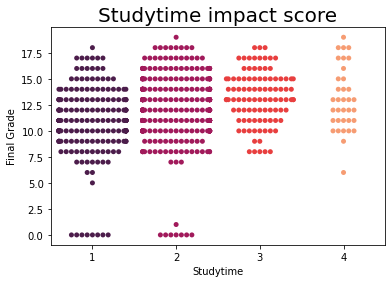

In [ ]:
studtime = sns.swarmplot('studytime','G3',data=df,palette="rocket")
studtime.axes.set_title('Studytime impact score', fontsize = 20)
studtime.set_xlabel('Studytime', fontsize = 10)
studtime.set_ylabel('Final Grade', fontsize = 10)
plt.show()

### Research of the best model for optimization.

In [ ]:
# splitting the data into training and testing data (75% and 25%)
# we mention the random state to achieve the same split everytime we run the code
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [ ]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
213,0.0,0.0,0.142857,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.0,0.5,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.75,1.00,0.25,0.00,0.25,0.50,0.0000,0.578947,0.526316
43,0.0,1.0,0.000000,1.0,0.0,1.0,0.50,0.50,0.75,0.75,0.0,0.0,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.00,0.75,0.00,0.00,0.00,0.00,0.0000,0.473684,0.526316
42,0.0,1.0,0.000000,1.0,0.0,1.0,1.00,1.00,0.75,1.00,0.0,0.0,0.000000,0.333333,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.75,0.50,0.50,0.00,0.00,1.00,0.0000,0.736842,0.789474
73,0.0,1.0,0.142857,1.0,0.0,1.0,0.75,0.25,0.50,0.50,1.0,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.00,0.50,0.25,0.25,0.25,1.00,0.0000,0.684211,0.684211
494,1.0,0.0,0.142857,0.0,1.0,1.0,0.25,0.50,0.00,0.50,0.0,0.5,0.000000,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.75,0.75,1.00,0.00,0.50,0.50,0.0000,0.421053,0.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,1.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.50,0.50,0.0,0.5,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.50,0.50,0.50,0.00,0.00,0.50,0.0000,0.578947,0.473684
106,0.0,0.0,0.000000,1.0,0.0,1.0,0.50,0.50,0.50,0.50,0.0,0.5,0.000000,1.000000,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.00,0.00,0.25,0.00,0.00,0.50,0.1250,0.526316,0.526316
270,0.0,1.0,0.142857,1.0,0.0,1.0,1.00,1.00,0.75,0.75,0.0,0.5,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.00,0.50,0.25,0.00,0.25,1.00,0.1250,0.736842,0.789474
435,1.0,0.0,0.000000,0.0,1.0,1.0,0.25,0.25,0.00,0.75,1.0,0.0,0.333333,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.00,0.75,0.50,0.00,0.25,0.75,0.0000,0.526316,0.526316


In [ ]:
y_train

213    11
43     10
42     15
73     14
494     9
       ..
71     10
106    10
270    15
435    10
102    12
Name: G3, Length: 486, dtype: int64

In [ ]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression','Random Forest', 'Extra Trees', 'SVM']
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = RandomForestRegressor(n_estimators=100)
    model3 = ExtraTreesRegressor(n_estimators=100)
    model4 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    results2 = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae, rmse = evaluate_predictions(predictions,y_test)
        
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]

    
    
    return results

In [ ]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,0.765321,1.15352
Random Forest,0.767301,1.20621
Extra Trees,0.792393,1.21207
SVM,1.58974,2.28437


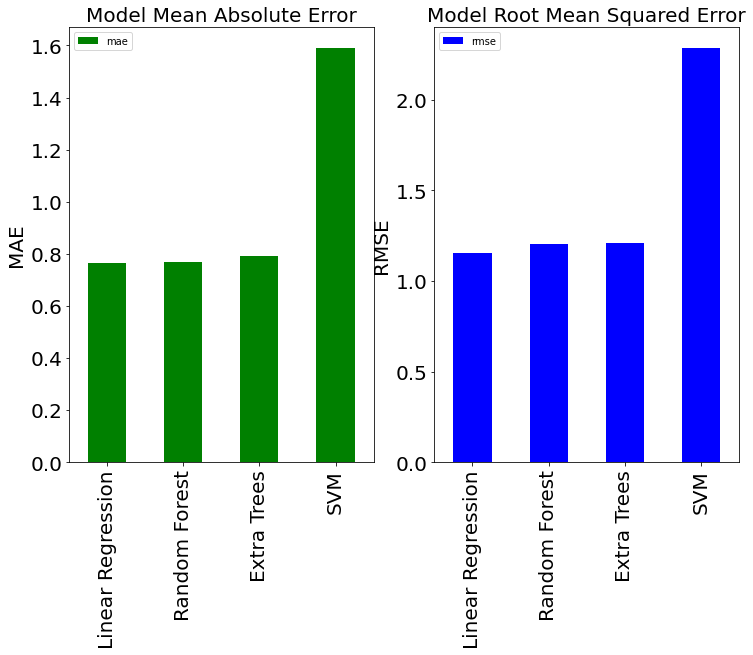

In [ ]:
plt.figure(figsize=(12, 8))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'g', ax = ax, fontsize=20)
plt.title('Model Mean Absolute Error', fontsize=20) 
plt.ylabel('MAE', fontsize=20)

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'b', ax = ax, fontsize=20)
plt.title('Model Root Mean Squared Error', fontsize=20) 
plt.ylabel('RMSE',fontsize=20)

plt.show()

In [ ]:
#First statistic of the final Grade
df['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


With all of this informations, we will now use a Linear Regression and check if all of the coefficients are correleate with there previous analyses.


### Linear Regression Model with Train and Test
Now We procede with train and test to check the coefficient of determination.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
dfcoef=pd.DataFrame(model.coef_)
dfcoef.head()

,0
0,-0.237717
1,-0.160029
2,0.125912
3,0.137603
4,0.067585


In [ ]:
predictions = model.predict(X_test)
print(predictions)

[ 7.05081621 15.08624382 16.71852196 10.20366438  8.69739621 12.10160696
 13.22777561 18.79812185 11.8956926  11.02454813 10.72522346 10.04065042
 13.18912226  8.02113322 18.36578683 12.23850161 13.33538049 12.39979812
 10.78110117 10.05070985 11.95540559 10.04875983 17.43048095 13.34844614
 12.76583569  0.31116169 12.66767803 13.31127606 10.96212396 12.83889693
 14.00947757 16.3062102  13.19078059 16.14322803 12.62631843  8.78597688
  9.16881277 11.30558117 13.01913082 11.09185642 15.471116   17.72074803
 11.17467012 13.59665983 12.2516075   8.91668259 12.70537979  8.66909845
 11.30900191  9.1220717   5.55855477 14.24240282  9.09071182 12.09484097
  6.8077891  11.52157107 11.69083016 11.38434212 14.48968532 14.61957865
 13.72755249  6.91275865 11.53527686  8.79682515 13.51578516 12.37063958
 11.81746867 12.80068059 14.79668095  6.56173596  7.86751513 11.11057452
 13.99256546 10.63371503 14.55866672 13.75825111 13.9483736  11.50714247
 13.55611238 12.21974666 14.64204865  8.77269761  9

In [ ]:
df_preval = pd.DataFrame(columns=['Prediction','Value'])
df_preval['Value'] = y_test
df_preval['Prediction'] = predictions
df_preval

,Prediction,Value
532,7.050816,8
375,15.086244,15
306,16.718522,16
625,10.203664,10
480,8.697396,10
...,...,...
403,15.808467,15
266,15.216460,14
641,16.823307,15
558,12.027846,10


In [ ]:
dfpred=pd.DataFrame(predictions)
dfpred.idxmax()


0    7
dtype: int64

In [ ]:
X_test.iloc[7]

school        0.000000
sex           0.000000
age           0.285714
address       1.000000
famsize       0.000000
Pstatus       1.000000
Medu          0.750000
Fedu          0.500000
Mjob          0.500000
Fjob          0.500000
reason        0.000000
guardian      0.500000
traveltime    0.000000
studytime     0.333333
failures      0.000000
schoolsup     0.000000
famsup        0.000000
paid          0.000000
activities    1.000000
nursery       0.000000
higher        1.000000
internet      1.000000
romantic      0.000000
famrel        1.000000
freetime      0.500000
goout         0.750000
Dalc          0.000000
Walc          0.500000
health        0.500000
absences      0.062500
G1            0.894737
G2            0.947368
Name: 240, dtype: float64

In [ ]:
r_sq = model.score(X_test, y_test)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.8577367271236553


In [ ]:
import pandas as pd
df = pd.read_csv(r"student-por.csv",sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [ ]:
new_df = pd.get_dummies(df, columns=['sex','school','age','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])
new_df.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sex_F,sex_M,school_GP,school_MS,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


In [ ]:
y = new_df['G3']
x = new_df.drop(columns=['G3'])

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Linear

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
newdfcoef=pd.DataFrame(model.coef_)
newdfcoef.head()

,0
0,-0.111940
1,0.020626
2,0.138202
3,0.054732
4,-0.265416


In [ ]:
predictions_lin = model.predict(X_test)
print(predictions_lin)

[ 7.1784339  15.38957283 16.45667689 10.17394424  8.91929717 12.29320709
 13.15972939 18.65881502 11.56058175 11.1165334  10.73343563 10.19344643
 13.42526693  7.86321076 18.65092108 12.34953997 12.87621606 12.43321328
 10.63263611 10.13075276 12.04918833  9.99220337 17.26074531 13.29488833
 12.7234892   0.37852536 12.74148689 13.3803236  11.00500353 12.6456232
 14.10991859 16.47933403 13.03184515 15.87170794 12.84669309  9.15933468
  8.57747379 11.2416473  12.9606974  11.18325031 15.61749491 17.88676963
 11.37728416 13.56359256 12.44554051  9.20226994 12.92890933  8.5844491
 11.24528737  9.17357732  5.48209303 14.25433959  8.82873537 12.12785918
  6.55405621 11.63315519 11.81678433 11.55916161 14.66399308 14.63042058
 13.83184477  7.04743236 11.59438218  8.85427113 13.21624171 12.27828654
 11.82957927 13.09129842 14.92971067  6.40605616  7.93641447 11.02631552
 14.03042171 10.6762091  14.4431264  13.8680693  13.93175388 11.51234088
 13.32378971 12.25818267 14.42147319  8.62556975 10.0

In [ ]:
dfpred=pd.DataFrame(predictions_lin)
dfpred.idxmax()

0    7
dtype: int64

In [ ]:
r_sq_lin = model.score(X_test, y_test)
print('coefficient of determination:', r_sq_lin)


coefficient of determination: 0.8570319079861473


### Forest

In [ ]:
forestmodel = RandomForestRegressor()

In [ ]:
forestmodel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
newdfcoef=pd.DataFrame(forestmodel)
newdfcoef.head()

,0
0,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
1,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
2,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
3,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
4,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


In [ ]:
predictions_for = forestmodel.predict(X_test)
print(predictions_for)

[ 6.68 14.7  15.91 10.12  9.53 12.86 12.67 17.6  12.25 11.46 10.43 10.62
 13.17  8.47 17.37 13.04 12.34 13.82 10.51 10.2  12.45 10.4  17.24 13.21
 12.39  0.98 12.73 13.36 11.21 13.03 13.25 16.19 13.2  16.08 13.05  8.87
  9.6  11.25 12.6  11.15 15.72 17.76 11.4  13.45 12.62  9.46 12.62  9.92
 11.55  9.1   7.16 15.02  9.99 12.51  7.74  9.95 11.   10.77 14.27 14.93
 13.94  7.41 10.94  9.61 13.34 12.46 11.2  13.38 14.63  3.06  6.22 11.53
 13.19 10.36 14.13 13.3  13.24 11.43 13.43 12.5  14.67 10.03 10.2  13.52
 18.03 11.26 10.41 13.4  13.51 13.09 11.85 15.76 17.22 11.82  7.87 10.2
 13.34 11.04 13.42 14.18 12.36  9.33  6.43 11.36  9.65 10.77 15.76 10.69
 10.52 15.67 12.36 13.32 14.36 13.27 10.98  9.57 15.74 16.21 10.08 10.61
  7.76 10.63  9.41 10.45 13.2  15.53 15.19 17.15 13.23 11.06]


In [ ]:
dfpred=pd.DataFrame(predictions_for)
dfpred.idxmax()

0    84
dtype: int64

In [ ]:
r_sq_forest = forestmodel.score(X_test, y_test)
print('coefficient of determination:', r_sq_forest)

coefficient of determination: 0.8311193276470981


### Tree

In [ ]:
treemodel = ExtraTreesRegressor()

In [ ]:
treemodel.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
newdfcoef=pd.DataFrame(treemodel)
newdfcoef.head()

,0
0,"ExtraTreeRegressor(ccp_alpha=0.0, criterion='m..."
1,"ExtraTreeRegressor(ccp_alpha=0.0, criterion='m..."
2,"ExtraTreeRegressor(ccp_alpha=0.0, criterion='m..."
3,"ExtraTreeRegressor(ccp_alpha=0.0, criterion='m..."
4,"ExtraTreeRegressor(ccp_alpha=0.0, criterion='m..."


In [ ]:
predictions_tree = treemodel.predict(X_test)
print(predictions_tree)

[ 5.79 15.3  16.19 10.16  9.51 12.55 13.01 17.93 12.28 11.52 10.74 10.46
 13.38  8.04 17.17 12.94 12.27 13.75 10.44  9.99 12.45 10.39 17.2  13.45
 12.49  0.54 12.83 13.61 10.74 13.27 13.43 16.37 13.1  16.59 13.21  8.97
  9.28 11.28 12.75 10.33 16.11 17.77 11.39 13.48 12.64 10.01 12.67  9.78
 11.59  9.22  6.89 14.91 10.2  12.4   7.2   9.74 10.94 11.4  13.76 14.57
 13.61  7.94 10.97  9.61 13.74 12.53 11.32 13.75 14.39  4.76  7.01 11.5
 12.84 10.64 13.87 13.72 12.7  11.79 13.83 12.25 14.16 10.02 10.22 13.83
 18.3  11.53 10.66 13.07 13.29 12.52 11.47 15.8  17.12 11.43  7.43 10.67
 13.59 11.14 13.63 14.11 12.16  9.39  6.03 11.23  9.77 10.84 15.81 10.64
 10.61 15.4  12.13 13.78 13.94 13.57 10.84  9.48 16.35 16.24 10.25 10.48
  7.23 10.86  9.5   9.29 13.13 15.78 15.14 17.08 11.9  11.14]


In [ ]:
dfpred=pd.DataFrame(predictions_tree)
dfpred.idxmax()

0    84
dtype: int64

In [ ]:
r_sq_tree = treemodel.score(X_test, y_test)
print('coefficient of determination:', r_sq_tree)

coefficient of determination: 0.848508895848604


### SVR

In [ ]:
svrmodel = SVR()

In [ ]:
svrmodel.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
predictions_svr = svrmodel.predict(X_test)
print(predictions_svr)

[ 8.06136415 14.58002518 16.03338348 10.47056878  9.44521276 12.89743404
 13.66192382 17.73693445 11.89114608 11.75988495 10.64792064 10.6661481
 13.70274945  8.7211967  17.64285521 12.66897553 13.23691772 12.51879971
 10.88175029 10.52477124 12.63441142 10.22479309 17.04412319 13.35571244
 12.43904341  5.24059533 12.5633006  13.47447422 11.5160453  12.49631459
 13.9194751  16.37167233 12.93384801 15.71401663 12.33836601  9.03680602
  9.91198522 11.3532196  12.80703676 11.1607663  15.47383042 16.81179866
 11.5557707  13.32380164 12.27203061  9.86460626 12.84000838  9.42815179
 11.52080988  9.1617393   6.97697454 15.10782346  9.52938113 12.17733893
  7.47064271 10.98031439 11.91316581 10.64183471 14.41272442 14.59694491
 12.81893871  8.28864569 11.34651587  9.17331124 13.43922125 12.69772565
 12.01054067 13.47729545 14.51868789  7.46766895  8.31231271 11.38999356
 13.80123427 10.56786557 14.45294637 13.80576185 14.08699592 11.78776303
 14.04686402 11.63518326 14.6552794  10.08162077 10.

In [ ]:
dfpred=pd.DataFrame(predictions)
dfpred.idxmax()

0    7
dtype: int64

In [ ]:
r_sq_svr = svrmodel.score(X_test, y_test)
print('coefficient of determination:', r_sq_svr)

coefficient of determination: 0.8489731203358455


In [ ]:
a = [[r_sq_lin,r_sq_forest,r_sq_tree,r_sq_svr]]
df = pd.DataFrame(a,columns=["Accuracy Linear","Accuracy Forest","Accuracy Tree","Accuracy SVR"])
df


,Accuracy Linear,Accuracy Forest,Accuracy Tree,Accuracy SVR
0,0.857032,0.831119,0.848509,0.848973


## Resultat Comparaison

In [ ]:
df_preval = pd.DataFrame(columns=['Prediction_lin','Prediction_forest','Prediction_tree','Prediction_svr','Value'])
df_preval['Value'] = y_test
df_preval['Prediction_lin'] = predictions_lin
df_preval['Prediction_forest'] = predictions_for
df_preval['Prediction_tree'] = predictions_tree
df_preval['Prediction_svr'] = predictions_svr
df_preval

,Prediction_lin,Prediction_forest,Prediction_tree,Prediction_svr,Value
532,7.178434,6.68,5.79,8.061364,8
375,15.389573,14.70,15.30,14.580025,15
306,16.456677,15.91,16.19,16.033383,16
625,10.173944,10.12,10.16,10.470569,10
480,8.919297,9.53,9.51,9.445213,10
...,...,...,...,...,...
403,16.082551,15.53,15.78,14.339308,15
266,15.262660,15.19,15.14,15.201634,14
641,16.668260,17.15,17.08,16.505232,15
558,12.071359,13.23,11.90,11.689881,10
